Big credit to Sudhir Kumar for the Linear Regression tutotial that can be found [here](http://https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial). This Project builds on and offers some clarity with my understanding of the concepts discussed in the tutorial as well. Though similar in results, I have also applied a different approach/method to training and testing the model.

##### We will build a linear regression model that predicts Medical Cost for Health Insurance. Dataset consists of the following independent variables:
1. Region
2. Age
3. Sex
4. BMI
5. Children
6. Smoker

The **charge** column is our dependent variable

# Definition and Modelling
Linear Regression is a supervised learning model used to predict a continous value. The goal of linear regression is to minimize the mean error estimate of our fit line. The error as we know is the distance between the fit line (predicted value) and the data points. 

We also know that we find the fit line by getting  the best Regression coefficients and intercept (if simple linear) and Coefficients (if multiple linear).

## Hypothesis Representation

Through General Knowledge though, we know that in a problem such as this, there could be multiple determinants for our dependent value, in this case the Charge. So we'll be using the Multiple Linear Regression model that estimate our relationships and predict our dependent variable (charge).

Multiple Linear Regression is just an extension of the simple linear regression in terms of how we train our model. Key difference here is that for multiple linear regression, we try estimate the coefficients for each independent variable. We do this using Ordinary least squares **(OLS)** which tries to estimate the coefficients by minimizing the Mean Square Error (MSE).

In a simple linear equation, we know that we can get the values of our fit line or predictions using the equation of a line $y = mx + c$, where $y$ is the dependent variable, $m$ is the slope, $x$ is the independent vatiable and **c** the intercept.

In Simple Linear Regression, we represent this as:

$$y = \theta_0 + \theta_1X_i$$

Where $y$ is the dependent variable, $\theta_0$ is the intercept and $\theta_i$ is the coefficient of the fit line (slope or gradient) and $X_i$ is the independent variable.

Like we said earlier, multiple linear regression is just an extension of the simple linear linear regression. Here, we use multiple independent variables to get our dependent variables. This is represented mathematically as:

$$y = \theta_0 + \theta_1X_1 + \theta_2X_2 + \theta_3X_3 + ..... + \theta_nX_n$$

Where $y$ is the dependent variable, $\theta_0$ is the intercept, $\theta_1 ..... \theta_n$ are the Coefficients of each independent variable and $X_1..........X_n$ are the independent variables.

### Import Libraries and Dataset
Let's import all the necessary libraries and dataset for analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

med_df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

print(med_df.shape)
med_df.head()

/kaggle/input/insurance/insurance.csv
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The shape indicates that we have **1333** observations or records in our dataset and **7** variables, 6 independent variables (age, sex, bmi, children, smoker, region) and 1 dependent variable - **charges**.

Text(0.5, 0.98, 'Charge VS BMI')

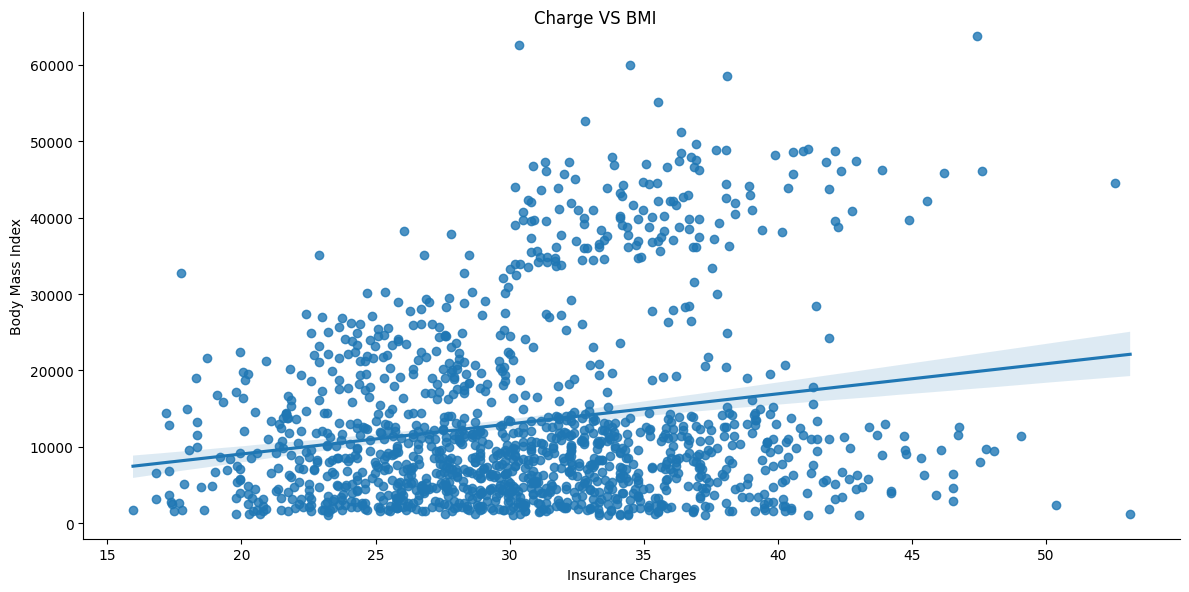

In [3]:
"""
Let's visualize our variable relationship using a seaborn library
lmplot using bmi as the independent variable and charges as the dependent variable.
The lmplot is a scatter plot overlaid with regression line. used to understand
the relationship between multiple variables within subsets of a dataset.
"""

g = sns.lmplot(x="bmi", y="charges", data=med_df, aspect=2, height=6)
g.set(xlabel="Insurance Charges", ylabel="Body Mass Index")
g.fig.suptitle("Charge VS BMI")

#### Exploratory Analysis

In [4]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
med_df[med_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
med_df.drop_duplicates(inplace=True)

In [8]:
med_df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

#### Plots

/tmp/ipykernel_21/319797664.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = med_df.corr()


<AxesSubplot: >

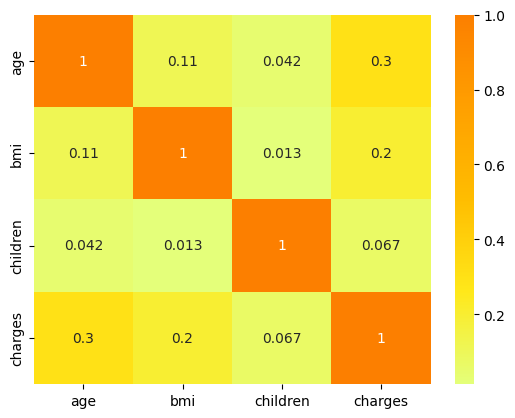

In [9]:
# Correlation plot
corr = med_df.corr()
sns.heatmap(corr, cmap = "Wistia", annot=True)

Seems there's no correlation among our variables

##### Let's try to understand the behaviour of our target variable. ( This is key to accurately predicting a dependent variable)
**Side Note: ** Any variable that exibhits normal ditribution is feasible to be forcasted with higher accuracy

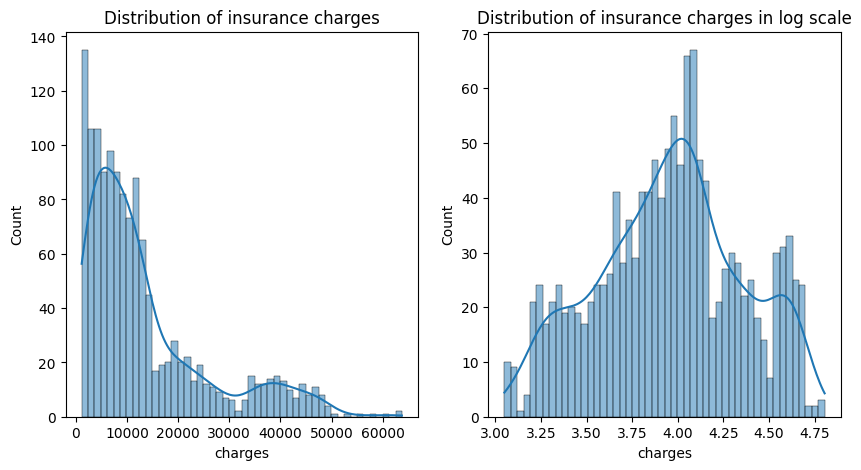

In [10]:
# Let's look at the distribution of our dependent variable (charges)
fig, ax = plt.subplots(1,2)

g = sns.histplot(med_df['charges'], bins=50, kde=True, ax=ax[0])
g.set(title="Distribution of insurance charges")

f = sns.histplot(np.log10(med_df['charges']), bins=50, kde=True, ax=ax[1])
f.set(title="Distribution of insurance charges in log scale")

fig.set_size_inches([10,5])

The distribution of charges as displayed in the left plot is right skewed. In the right however, we apply natural log which makes the plot apporxoimately tend to a normal distribution. For further analysis, we will apply log on target variable charges

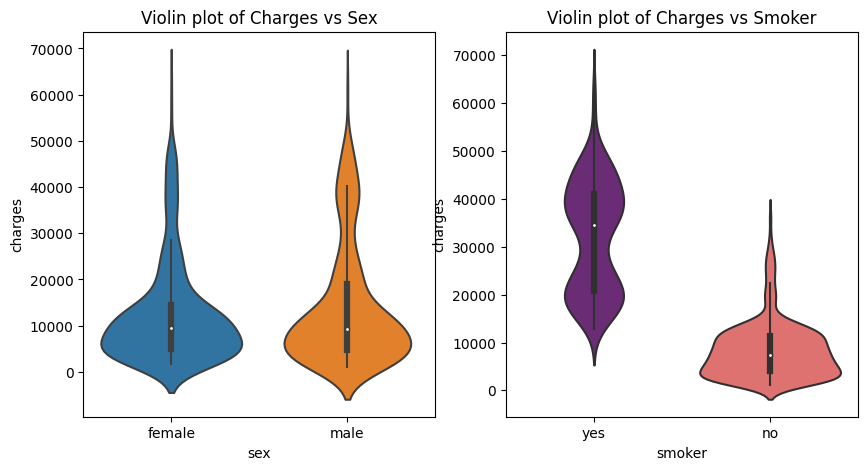

In [11]:
fig, ax = plt.subplots(1,2)

g = sns.violinplot(x="sex", y="charges", data=med_df, ax=ax[0])
g.set(title="Violin plot of Charges vs Sex")

f = sns.violinplot(x="smoker", y="charges", data=med_df, ax=ax[1], palette='magma')
f.set(title="Violin plot of Charges vs Smoker")

fig.set_size_inches([10,5])

From the left plot, we can see that the average amount paid by both sexes centers around the same amount. In the right plot however, the charges paid by smokers is much wide range compared to non-smokers. The average charges for non-smokers is about $5000 which is the minimum amount for smokers. Interesting

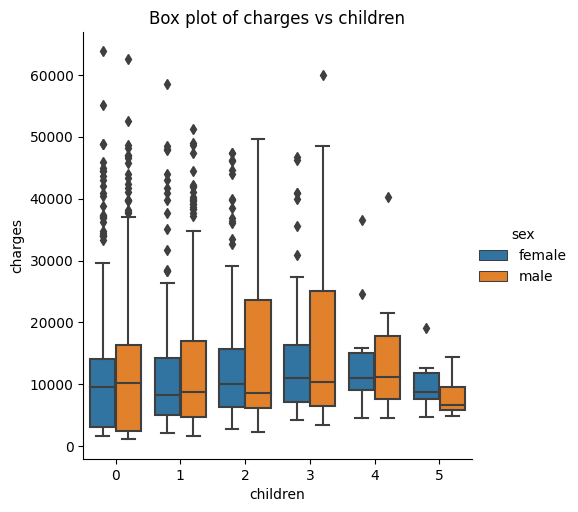

In [12]:
g = sns.catplot(x="children", y="charges", hue="sex", kind="box", data=med_df)
g.set(title="Box plot of charges vs children")
fig.set_size_inches([5,10])

In [13]:
med_df.groupby('children')['charges'].agg(['mean','min',max])

,mean,min,max
children,,,
0,12384.695344,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


We can see that from our plots and estimates, while the minimum insurance cost for each category looks linear, the insurance charges are really not affected by the number of kids an individual has or the sex of the child.

[Text(0.5, 1.0, 'Violin plot of Charges vs children')]

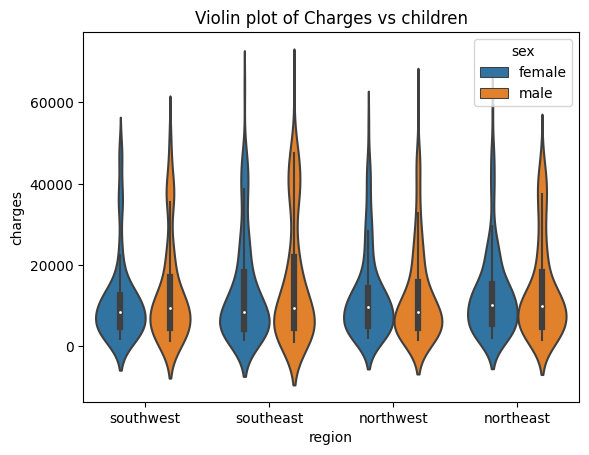

In [14]:
g = sns.violinplot(x="region", y="charges", hue='sex', data=med_df)
g.set(title="Violin plot of Charges vs children")

[Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')]

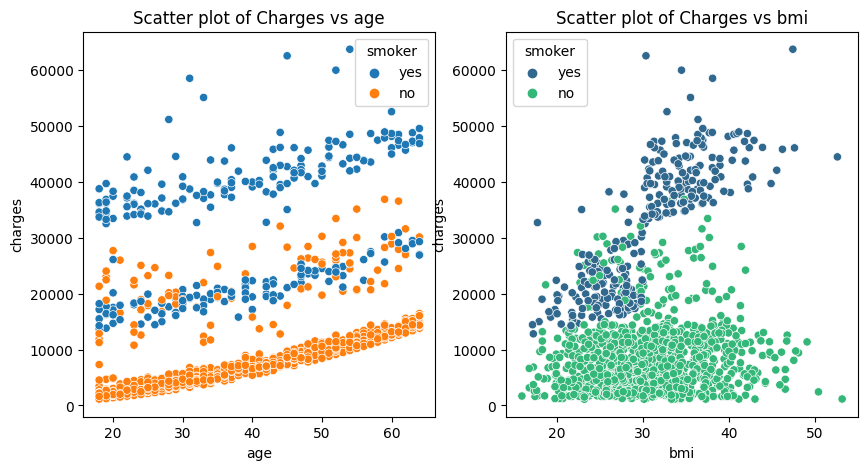

In [15]:
fig, ax = plt.subplots(1,2)

g = sns.scatterplot(x="age", y='charges', data=med_df, hue='smoker', ax=ax[0])
g.set(title="Scatter plot of Charges vs age")
fig.set_size_inches([10,5])

f = sns.scatterplot(x="bmi", y='charges', data=med_df, palette="viridis", hue="smoker", ax=ax[1])
f.set(title="Scatter plot of Charges vs bmi")

In the left plot, we can see that while most non-smokers pay substantially low insurance cost, and smokers pay high insurance costs, age is not a factor or determinant. In the right plot, we can also see that smokers pay more and the bmi is not rally a factor as well.

#### PreProcessing Categorical Data

#### Encoding
As we know, most machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number. This can be done through various methods.
* Label Encoding
* One hot encoding
* Dummy variable trap

In **label encoding**, we transform the word labels into numerical forms so that the algorithm can operate on them

A **One hot encoding** is a representation of categorical variable as binary vectors. It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more independent variables are highly correlated.


Using the **pandas get_dummies** function, we can do all we mentioned above. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [16]:
categorical_columns = ['sex',"children", "smoker", "region"]
med_df_encode = pd.get_dummies(data=med_df, prefix="OHE", prefix_sep='_', columns=categorical_columns, drop_first=True, dtype='int8')

# The drop_first parameter specifies whether or not you want to drop the first category of the categorical variable you're encoding

In [17]:
# Verifying the dummy variables
print('Columns in the original data frame:\n', med_df.columns.values)
print('_________________________________')
print('\nNumber of rows and columns in the dataset:', med_df.shape)
print('_________________________________')
print('Columns in the data frame after encoding:\n', med_df_encode.columns.values)
print('_________________________________')
print('\nNumber of rows and columns in the dataset:', med_df_encode.shape)

Columns in the original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']
_________________________________

Number of rows and columns in the dataset: (1337, 7)
_________________________________
Columns in the data frame after encoding:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']
_________________________________

Number of rows and columns in the dataset: (1337, 13)


#### Box-Cox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.

The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval

In [18]:
from scipy.stats import boxcox

y_bc, lam, ci = boxcox(med_df_encode['charges'], alpha=0.05)

ci, lam

((-0.011576269777122257, 0.09872104960017168), 0.043516942579678274)

<AxesSubplot: xlabel='charges', ylabel='Count'>

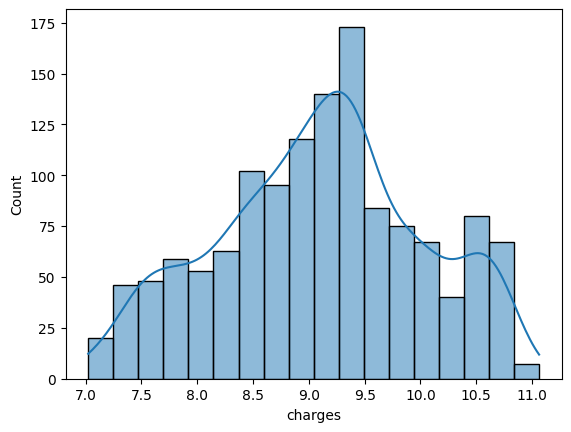

In [19]:
# Log Transform

med_df_encode['charges'] = np.log(med_df_encode['charges'])

#check normality

sns.histplot(med_df_encode['charges'], kde=True)

#### Train / Test Split
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. Will provide a more accurate evaluation on out-of-sample accuracy since the test dataset is not part of the dataset used to train the model

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the np.random.rand() function:

In [20]:
msk = np.random.rand(len(med_df_encode)) < 0.8
train = med_df_encode[msk]
test = med_df_encode[~msk]

print(train.shape)
print(test.shape)

(1047, 13)
(290, 13)


#### Model Building
Here, we will build our linear regression model using scikit-learn. Remember we discussed that multiple linear regression is just an extension of simple linear regression.

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = train[['age', 'bmi', 'OHE_male', 'OHE_1', 'OHE_2', 'OHE_3', 'OHE_4', 'OHE_5',
 'OHE_yes', 'OHE_northwest', 'OHE_southeast', 'OHE_southwest']]
y = train[['charges']]

regr.fit(x, y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[ 0.0348822   0.01458177 -0.09434556  0.16395254  0.30570241  0.22539225
   0.45227746  0.45457919  1.52655903 -0.09278109 -0.20413356 -0.15019226]]
Intercept:  [6.9864643]


#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['age', 'bmi', 'OHE_male', 'OHE_1', 'OHE_2', 'OHE_3', 'OHE_4', 'OHE_5',
 'OHE_yes', 'OHE_northwest', 'OHE_southeast', 'OHE_southwest']])
test_y = np.asanyarray(test[['charges']])

predicts = regr.predict(test_x)

print("Residual sum of squares(MSE): ", round(np.mean((predicts - test_y) ** 2), 2))
print("R2-score: ", round(r2_score(test_y, predicts), 2))

Residual sum of squares(MSE):  0.22
R2-score:  0.73


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We have evaluated our model and gotten an R2-Score of **73%** which is a good fit for our data, although we could still try various techniques to improve our model. Also important to note is that we had to transform our dependent variable by apply a log to our in other to make it normal.